In [5]:
import mxnet as mx
import numpy as np
import logging
import math
from skimage import io
from sklearn import utils
logging.basicConfig(level = logging.DEBUG)

In [8]:
data_sign = ['left','right','left_downsample','right_downsample','label','LinearRegression_label']
left  = mx.sym.Variable('left')
right = mx.sym.Variable('right')
leftdownsample = mx.sym.Variable('left_downsample')
rightdownsample= mx.sym.Variable('right_downsample')
weight1_blue = mx.sym.Variable('l1_blue')
weight2_blue = mx.sym.Variable('l2_blue')
weight3_blue = mx.sym.Variable('l3_blue')
weight4_blue = mx.sym.Variable('l4_blue')
b1_blue = mx.sym.Variable('bias1_blue')
b2_blue = mx.sym.Variable('bias2_blue')
b3_blue = mx.sym.Variable('bias3_blue')
b4_blue = mx.sym.Variable('bias4_blue')
weight1_red  = mx.sym.Variable('l1_red')
weight2_red  = mx.sym.Variable('l2_red')
weight3_red  = mx.sym.Variable('l3_red')
weight4_red  = mx.sym.Variable('l4_red')
b1_red = mx.sym.Variable('bias1_red')
b2_red = mx.sym.Variable('bias2_red')
b3_red = mx.sym.Variable('bias3_red')
b4_red = mx.sym.Variable('bias4_red')
conv1_1_blue = mx.sym.Convolution(data=left, weight=weight1_blue,bias =b1_blue,kernel=(3,3),pad=(1,1),num_filter = 32)
relu1_1_blue = mx.symbol.Activation(data=conv1_1_blue, act_type="relu")
conv1_2_blue = mx.sym.Convolution(data=right,weight=weight1_blue,bias =b1_blue,kernel=(3,3),pad=(1,1),num_filter = 32)
relu1_2_blue = mx.symbol.Activation(data=conv1_2_blue, act_type="relu")
conv2_1_blue = mx.sym.Convolution(data=relu1_1_blue,weight=weight2_blue,bias = b2_blue,kernel=(3,3),pad=(1,1),num_filter = 32)
relu2_1_blue = mx.symbol.Activation(data=conv2_1_blue, act_type="relu")
conv2_2_blue = mx.sym.Convolution(data=relu1_2_blue,weight=weight2_blue,bias = b2_blue,kernel=(3,3),pad=(1,1),num_filter = 32)
relu2_2_blue = mx.symbol.Activation(data=conv2_2_blue, act_type="relu")
conv3_1_blue = mx.sym.Convolution(data=relu2_1_blue,weight=weight3_blue,bias = b3_blue,kernel=(5,5),pad=(2,2),num_filter = 200)
relu3_1_blue = mx.symbol.Activation(data=conv3_1_blue, act_type="relu")
conv3_2_blue = mx.sym.Convolution(data=relu2_2_blue,weight=weight3_blue,bias = b3_blue,kernel=(5,5),pad=(2,2),num_filter = 200)
relu3_2_blue = mx.symbol.Activation(data=conv3_2_blue, act_type="relu")
conv4_1_blue = mx.sym.Convolution(data=relu3_1_blue,weight=weight4_blue,bias = b4_blue,kernel=(5,5),pad=(2,2),num_filter = 200)
relu4_1_blue = mx.symbol.Activation(data=conv4_1_blue, act_type="relu")
conv4_2_blue = mx.sym.Convolution(data=relu3_2_blue,weight=weight4_blue,bias = b4_blue,kernel=(5,5),pad=(2,2),num_filter = 200)
relu4_2_blue = mx.symbol.Activation(data=conv4_2_blue, act_type="relu")

conv1_1_red = mx.sym.Convolution(data=leftdownsample, weight=weight1_red,bias = b1_red,kernel=(3,3),pad=(1,1),num_filter = 32)
conv1_2_red = mx.sym.Convolution(data=rightdownsample,weight=weight1_red,bias = b1_red,kernel=(3,3),pad=(1,1),num_filter =32)
conv2_1_red = mx.sym.Convolution(data=conv1_1_red,weight=weight2_red,bias = b2_red,kernel=(3,3),pad=(1,1),num_filter = 32)
conv2_2_red = mx.sym.Convolution(data=conv1_2_red,weight=weight2_red,bias = b2_red,kernel=(3,3),pad=(1,1),num_filter = 32)
conv3_1_red = mx.sym.Convolution(data=conv2_1_red,weight=weight3_red,bias = b3_red,kernel=(5,5),pad=(2,2),num_filter = 200)
conv3_2_red = mx.sym.Convolution(data=conv2_2_red,weight=weight3_red,bias = b3_red,kernel=(5,5),pad=(2,2),num_filter = 200)
conv4_1_red = mx.sym.Convolution(data=conv3_1_red,weight=weight4_red,bias = b4_red,kernel=(5,5),pad=(2,2),num_filter = 200)
conv4_2_red = mx.sym.Convolution(data=conv3_2_red,weight=weight4_red,bias = b4_red,kernel=(5,5),pad=(2,2),num_filter = 200)

f_blue1 = mx.sym.Flatten(data = relu4_1_blue)
f_blue2 = mx.sym.Flatten(data = relu4_2_blue)
f_red1  = mx.sym.Flatten(data = conv4_1_red)
f_red2  = mx.sym.Flatten(data = conv4_2_red)
#dot = Dot()
#s = dot(x = f_blue1 ,y =f_blue2,name='dot_product1') #+ w2*dot(x = f_red1,y = f_red2,name='dot_product2')
s = mx.sym.Dotproduct( data1 = f_blue1, data2 = f_blue2 )
net = mx.sym.Group([f_blue1,f_blue2,s])

batch_size = 1024
s1 = (batch_size,3,13,13)
s2 = (batch_size,3,7,7)

args_shape,out_shape,aux_shape = net.infer_shape(left=s1,right=s1)
args_shape = dict(zip(net.list_arguments(),args_shape))
executor = net.simple_bind(ctx=mx.gpu(3),grad_req='write',left = s1,right= s1)
keys = net.list_arguments()
args = executor.arg_arrays
grads = dict(zip(net.list_arguments(),executor.grad_arrays))
args = dict(zip(keys,args))
auxs = dict(zip(keys,executor.arg_arrays))

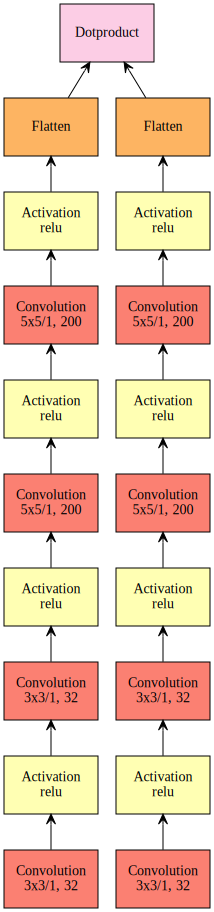

In [9]:
mx.viz.plot_network(net)